In [4]:
csv_file = "Metadata_1000_revised.xlsx"
import pandas as pd

# Read the Excel file
df = pd.read_excel(csv_file)
# print column names
print(df.columns)

Index(['UID', 'PatientID', 'Age', 'cardiomegaly', 'congestion',
       'pleural_effusion_right', 'pleural_effusion_left',
       'pneumonic_infiltrates_right', 'pneumonic_infiltrates_left',
       'atelectasis_right', 'atelectasis_left', 'revised', 'cardiomegaly2',
       'congestion2', 'pleural_effusion_right2', 'pleural_effusion_left2',
       'pneumonic_infiltrates_right2', 'pneumonic_infiltrates_left2',
       'atelectasis_right2', 'atelectasis_left2',
       'Pneumothorax_right (0=no; 1=yes)', 'Pneumothorax_left (0=no; 1=yes)',
       'Sonstiges'],
      dtype='object')


Number of samples where finding scores changed:
cardiomegaly: 429 (42.9%)
congestion: 314 (31.4%)
pleural_effusion_right: 343 (34.3%)
pleural_effusion_left: 383 (38.3%)
pneumonic_infiltrates_right: 407 (40.7%)
pneumonic_infiltrates_left: 413 (41.3%)
atelectasis_right: 430 (43.0%)
atelectasis_left: 451 (45.1%)

Number of samples where finding changed from 0 to non-zero:
cardiomegaly: 124 (12.4%)
congestion: 143 (14.3%)
pleural_effusion_right: 149 (14.9%)
pleural_effusion_left: 144 (14.4%)
pneumonic_infiltrates_right: 232 (23.2%)
pneumonic_infiltrates_left: 269 (26.9%)
atelectasis_right: 158 (15.8%)
atelectasis_left: 155 (15.5%)

Number of samples where finding changed from non-zero to 0:
cardiomegaly: 34 (3.4%)
congestion: 19 (1.9%)
pleural_effusion_right: 35 (3.5%)
pleural_effusion_left: 38 (3.8%)
pneumonic_infiltrates_right: 10 (1.0%)
pneumonic_infiltrates_left: 20 (2.0%)
atelectasis_right: 44 (4.4%)
atelectasis_left: 35 (3.5%)

Number of samples where finding changed by more than 1:


,Finding,Changes,Zero to Non-zero,Non-zero to Zero,Changes > 1,Changes %,Zero to Non-zero %,Non-zero to Zero %,Changes > 1 %
0,cardiomegaly,429,124,34,105,42.9,12.4,3.4,10.5
1,congestion,314,143,19,79,31.4,14.3,1.9,7.9
2,pleural_effusion_right,343,149,35,93,34.3,14.9,3.5,9.3
3,pleural_effusion_left,383,144,38,86,38.3,14.4,3.8,8.6
4,pneumonic_infiltrates_right,407,232,10,89,40.7,23.2,1.0,8.9
5,pneumonic_infiltrates_left,413,269,20,98,41.3,26.9,2.0,9.8
6,atelectasis_right,430,158,44,98,43.0,15.8,4.4,9.8
7,atelectasis_left,451,155,35,91,45.1,15.5,3.5,9.1


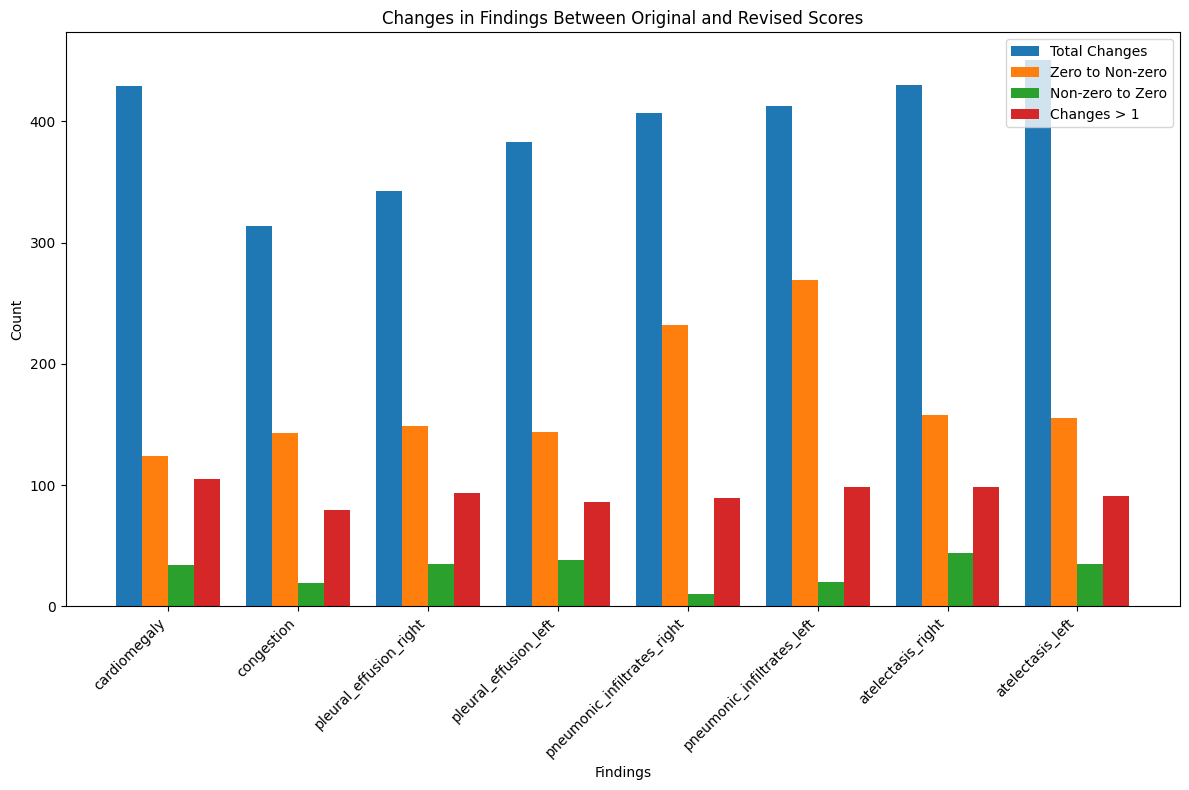

In [6]:
# First, let's identify the original and revised columns
import pandas as pd
import numpy as np

# Read the Excel file
df = pd.read_excel(csv_file)

# Get all finding names without the "2" suffix
findings = [
    "cardiomegaly", "congestion", 
    "pleural_effusion_right", "pleural_effusion_left",
    "pneumonic_infiltrates_right", "pneumonic_infiltrates_left",
    "atelectasis_right", "atelectasis_left"
]

# Create empty dictionaries to store results
changes = {}
zero_to_nonzero = {}
nonzero_to_zero = {}
changes_more_than_one = {}

# Analyze each finding
for finding in findings:
    # Original column is just the finding name
    original = finding
    # Revised column has "2" suffix
    revised = f"{finding}2"
    
    # Make sure both columns exist
    if original in df.columns and revised in df.columns:
        # Count how many scores changed
        changes[finding] = (df[original] != df[revised]).sum()
        
        # Count zero to non-zero changes
        zero_to_nonzero[finding] = ((df[original] == 0) & (df[revised] != 0)).sum()
        
        # Count non-zero to zero changes
        nonzero_to_zero[finding] = ((df[original] != 0) & (df[revised] == 0)).sum()
        
        # Count changes of more than 1
        changes_more_than_one[finding] = (abs(df[original] - df[revised]) > 1).sum()
    else:
        print(f"Warning: Could not find columns for {finding}")

# Print results
print("Number of samples where finding scores changed:")
for finding, count in changes.items():
    print(f"{finding}: {count} ({count/len(df)*100:.1f}%)")

print("\nNumber of samples where finding changed from 0 to non-zero:")
for finding, count in zero_to_nonzero.items():
    print(f"{finding}: {count} ({count/len(df)*100:.1f}%)")

print("\nNumber of samples where finding changed from non-zero to 0:")
for finding, count in nonzero_to_zero.items():
    print(f"{finding}: {count} ({count/len(df)*100:.1f}%)")

print("\nNumber of samples where finding changed by more than 1:")
for finding, count in changes_more_than_one.items():
    print(f"{finding}: {count} ({count/len(df)*100:.1f}%)")

# Create a summary DataFrame
summary = pd.DataFrame({
    'Finding': findings,
    'Changes': [changes.get(f, 0) for f in findings],
    'Zero to Non-zero': [zero_to_nonzero.get(f, 0) for f in findings],
    'Non-zero to Zero': [nonzero_to_zero.get(f, 0) for f in findings],
    'Changes > 1': [changes_more_than_one.get(f, 0) for f in findings]
})

# Calculate percentages
summary['Changes %'] = summary['Changes'] / len(df) * 100
summary['Zero to Non-zero %'] = summary['Zero to Non-zero'] / len(df) * 100
summary['Non-zero to Zero %'] = summary['Non-zero to Zero'] / len(df) * 100
summary['Changes > 1 %'] = summary['Changes > 1'] / len(df) * 100

# Display summary
print("\nSummary:")
display(summary)

# Create visualizations
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(findings))

plt.bar(index, [changes.get(f, 0) for f in findings], bar_width, 
        label='Total Changes')
plt.bar(index + bar_width, [zero_to_nonzero.get(f, 0) for f in findings], bar_width,
        label='Zero to Non-zero')
plt.bar(index + 2*bar_width, [nonzero_to_zero.get(f, 0) for f in findings], bar_width,
        label='Non-zero to Zero')
plt.bar(index + 3*bar_width, [changes_more_than_one.get(f, 0) for f in findings], bar_width,
        label='Changes > 1')

plt.xlabel('Findings')
plt.ylabel('Count')
plt.title('Changes in Findings Between Original and Revised Scores')
plt.xticks(index + 1.5*bar_width, findings, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()